In [1]:
import numpy as np
import cv2
import os
import tensorflow as tf
import torch

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def load_spectrogram_dataset(spectrogram_folder):
    
    data_array=[]
    class_name=[]
    
    for class_folder in os.listdir(spectrogram_folder):
        
        for file in os.listdir(os.path.join(spectrogram_folder, class_folder)):
            
            spectrogram_path = os.path.join(spectrogram_folder, class_folder,  file)
            spectrogram = cv2.imread(spectrogram_path, cv2.IMREAD_GRAYSCALE)   #grayscaling
            spectrogram = cv2.resize(spectrogram, (64, 64),interpolation = cv2.INTER_AREA)   #resizing
            spectrogram = spectrogram / 255.0   #normalization
            data_array.append(spectrogram)
            class_name.append(class_folder)
            
    return np.array(data_array), np.array(class_name)

In [3]:
DIR_SPEC = './spec'

data, labels = load_spectrogram_dataset(DIR_SPEC)

In [4]:
type(data)

numpy.ndarray

In [5]:
np.shape(data)

(8732, 64, 64)

In [6]:
np.shape(labels)

(8732,)

In [7]:
def reshape_(data, labels):
    data = np.reshape(data, (data.shape[0], data.shape[1], data.shape[2], 1))
    labels = to_categorical(labels)
    
    return data, labels

In [8]:
data, labels = reshape_(data, labels)
print("data shape: ", data.shape)
print("labels shape: ", labels.shape)

data shape:  (8732, 64, 64, 1)
labels shape:  (8732, 10)


In [9]:
np.shape(labels)

(8732, 10)

In [10]:
data[0]

array([[[0.63137255],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.63137255],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.00392157],
        [0.01176471]],

       [[0.63137255],
        [0.00784314],
        [0.01568627],
        ...,
        [0.01568627],
        [0.02352941],
        [0.05490196]],

       ...,

       [[0.63137255],
        [0.5254902 ],
        [0.71764706],
        ...,
        [0.83921569],
        [0.71764706],
        [0.63921569]],

       [[0.63137255],
        [0.39607843],
        [0.61176471],
        ...,
        [0.69411765],
        [0.69019608],
        [0.63921569]],

       [[0.87843137],
        [0.7254902 ],
        [0.75294118],
        ...,
        [0.75686275],
        [0.77254902],
        [0.75294118]]])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [12]:
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 1)

In [13]:
np.shape(x_val)

(873, 64, 64, 1)

In [14]:
type(x_train)

numpy.ndarray

In [15]:
y_train.dtype

dtype('float32')

In [31]:
filters = [24,32]
padding = (2, 2)
pool_size = (2, 2) 
kernel_size = (5, 5)  
input_shape = (64, 64, 1)
class_number = 10

model = tf.keras.models.Sequential([
        tf.keras.layers.ZeroPadding2D(padding = padding, input_shape = input_shape),
        tf.keras.layers.Conv2D(filters[0], kernel_size),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(pool_size = pool_size),
    
        tf.keras.layers.Conv2D(filters[1], kernel_size),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(pool_size = pool_size),
    
        tf.keras.layers.Conv2D(filters[1], kernel_size),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D(pool_size = pool_size),
    
        tf.keras.layers.Dropout(0.2),
    
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(class_number, activation = 'softmax')
])
    

In [32]:
model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 68, 68, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 24)        624       
                                                                 
 batch_normalization_4 (Batc  (None, 64, 64, 24)       96        
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 64, 64, 24)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 24)       0         
 2D)                                                             
                                                      

In [34]:
history = model.fit(x_train,y_train, epochs=10, batch_size=16, validation_data = (x_val, y_val))

Epoch 1/10
437/437 [==============================] - 30s 68ms/step - loss: 1.3388 - accuracy: 0.5329 - val_loss: 1.6762 - val_accuracy: 0.4353
Epoch 2/10
437/437 [==============================] - 30s 68ms/step - loss: 0.8342 - accuracy: 0.7205 - val_loss: 1.3954 - val_accuracy: 0.5315
Epoch 3/10
437/437 [==============================] - 32s 73ms/step - loss: 0.6286 - accuracy: 0.7921 - val_loss: 0.8261 - val_accuracy: 0.7526
Epoch 4/10
437/437 [==============================] - 29s 67ms/step - loss: 0.5142 - accuracy: 0.8311 - val_loss: 0.8734 - val_accuracy: 0.7297
Epoch 5/10
437/437 [==============================] - 34s 78ms/step - loss: 0.4393 - accuracy: 0.8561 - val_loss: 0.7408 - val_accuracy: 0.7572
Epoch 6/10
437/437 [==============================] - 33s 75ms/step - loss: 0.3747 - accuracy: 0.8709 - val_loss: 1.2277 - val_accuracy: 0.6071
Epoch 7/10
437/437 [==============================] - 30s 70ms/step - loss: 0.3090 - accuracy: 0.8935 - val_loss: 0.3105 - val_accuracy:

In [35]:
history.history

{'loss': [1.33881676197052,
  0.8341619372367859,
  0.6285691261291504,
  0.514162540435791,
  0.4392773509025574,
  0.37472593784332275,
  0.3089888095855713,
  0.28186291456222534,
  0.2580389976501465,
  0.23143526911735535],
 'accuracy': [0.5328561067581177,
  0.7205440402030945,
  0.7921259999275208,
  0.8310665488243103,
  0.856120228767395,
  0.8708661198616028,
  0.8934860229492188,
  0.9055117964744568,
  0.9078024625778198,
  0.9212598204612732],
 'val_loss': [1.6761763095855713,
  1.3953973054885864,
  0.826072096824646,
  0.8734183311462402,
  0.7407925724983215,
  1.2276616096496582,
  0.31052324175834656,
  0.8836931586265564,
  0.5117674469947815,
  0.6754664778709412],
 'val_accuracy': [0.4352806508541107,
  0.5315005779266357,
  0.7525773048400879,
  0.7296677827835083,
  0.7571592330932617,
  0.6071019768714905,
  0.904925525188446,
  0.7262313961982727,
  0.8453608155250549,
  0.7972508668899536]}

C:\Users\BUSENUR\AppData\Local\Temp\ipykernel_25376\4232462637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\BUSENUR\AppData\Local\Temp\ipykernel_25376\4232462637.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

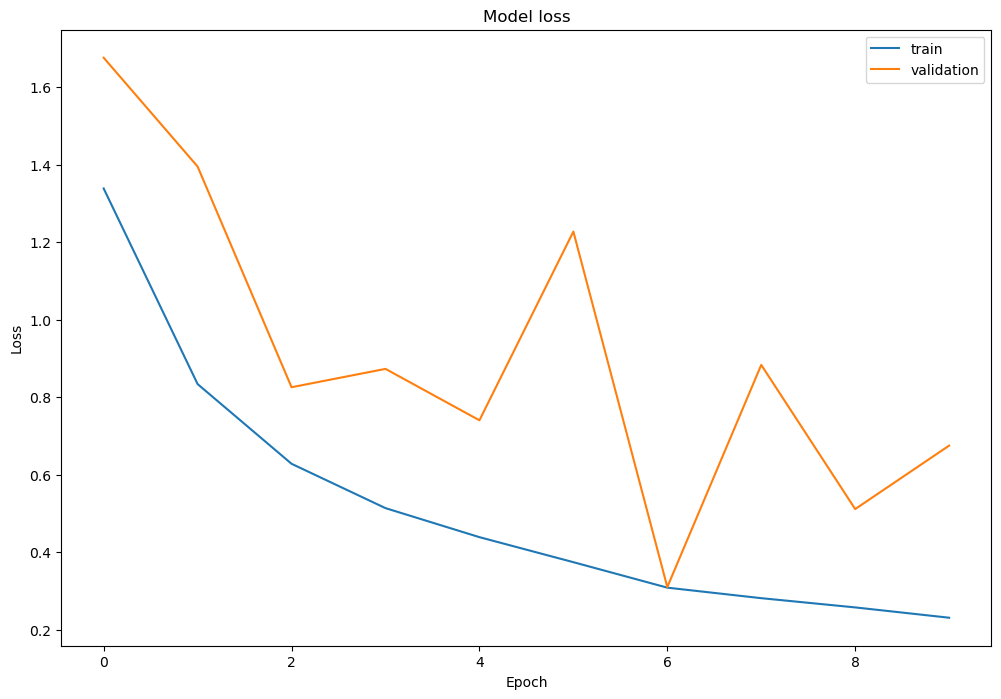

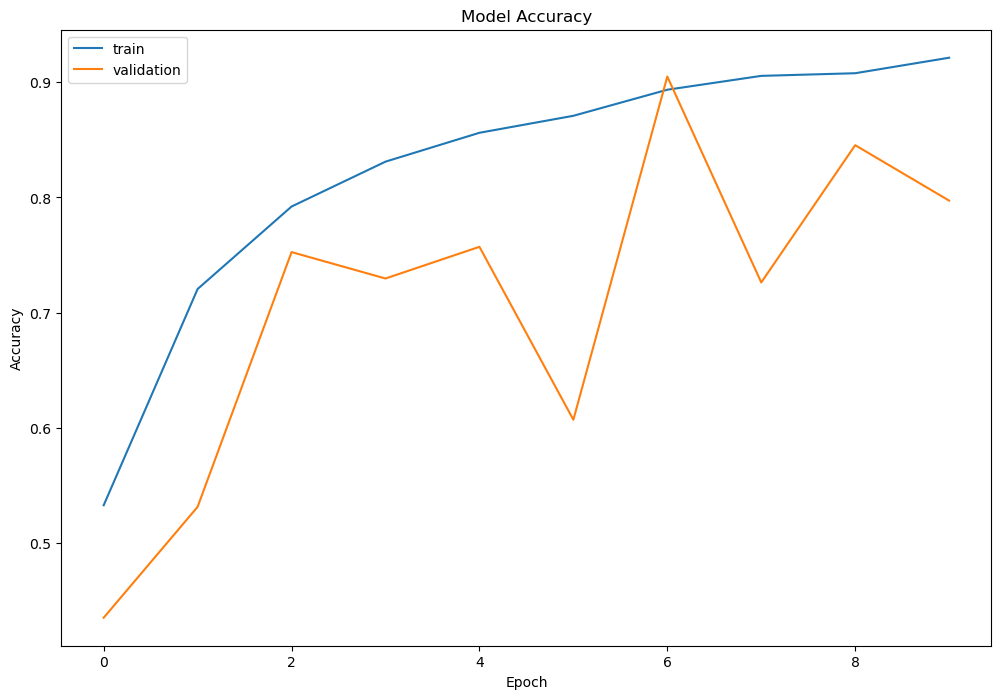

In [36]:
import pandas as pd
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [45]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 1s 21ms/step - loss: 0.7752 - accuracy: 0.7895


[0.7752285599708557, 0.7894737124443054]

https://paperswithcode.com/dataset/urbansound8k-1